In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
from numpy import mean
from numpy import std
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier,ExtraTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import LinearSVC
from sklearn import tree
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score
from yellowbrick.model_selection import validation_curve 
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from warnings import simplefilter
from sklearn.exceptions import ConvergenceWarning
simplefilter("ignore", category=ConvergenceWarning)
from warnings import filterwarnings
filterwarnings('ignore')

In [75]:
data=pd.read_csv("wineQuality_processed.csv")
data_temp=data
X=data.drop(['quality'],axis=1)
y=data['quality']

In [76]:
model_SVM=SVC(C=10,degree=2,gamma=0.1,kernel='rbf',max_iter=2000,random_state=10,probability=True)
accuracy_SVM = cross_val_score(model_SVM, X, y, scoring='accuracy', cv = 10)
print("--------------- SUPPORT VECTOR MACHINE ---------------")
print(accuracy_SVM)
print("Accuracy of SVM Model with Cross Validation is:",accuracy_SVM.mean() * 100)
model_Ada=AdaBoostClassifier(algorithm='SAMME.R',base_estimator=DecisionTreeClassifier(max_depth=3),learning_rate=0.2,n_estimators=500)
accuracy_Ada = cross_val_score(model_Ada, X, y, scoring='accuracy', cv = 10)
print("--------------- ADABOOST ALGORITHM ---------------")
print(accuracy_Ada)
print("Accuracy of AdaBoost Model with Cross Validation is:",accuracy_Ada.mean() * 100)
model_GB=GradientBoostingClassifier(learning_rate=0.3,max_depth=10,min_samples_leaf=10,min_samples_split=4,n_estimators=70)
accuracy_GB = cross_val_score(model_GB, X, y, scoring='accuracy', cv = 10)
print("--------------- GRADIENT BOOSTING ALGORITHM ---------------")
print(accuracy_GB)
print("Accuracy of Gradient Boosting Model with Cross Validation is:",accuracy_GB.mean() * 100)

--------------- SUPPORT VECTOR MACHINE ---------------
[0.67076923 0.73538462 0.73230769 0.70461538 0.72307692 0.72615385
 0.74461538 0.79044684 0.62557781 0.77041602]
Accuracy of SVM Model with Cross Validation is: 72.23363754889178
--------------- ADABOOST ALGORITHM ---------------
[0.67076923 0.71384615 0.71692308 0.71384615 0.72153846 0.74769231
 0.74       0.74884438 0.51309707 0.72419106]
Accuracy of AdaBoost Model with Cross Validation is: 70.10747896171625
--------------- GRADIENT BOOSTING ALGORITHM ---------------
[0.67384615 0.70769231 0.72153846 0.74615385 0.74153846 0.75230769
 0.74769231 0.77195686 0.56548536 0.74268105]
Accuracy of Gradient Boosting Model with Cross Validation is: 71.70892497333175


In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=30)

In [9]:
def f_p_r(model,test_size,name,n):
    global reps
    if test_size==0.20:
        predicts_20=model.predict(X_test_20)
        reps=classification_report(y_test_20,predicts_20,output_dict=True)
        f1=reps['macro avg']['f1-score']
        precs=reps['macro avg']['precision']
        print("With test_size=0.20 for ",name," f1 score:",f1)
        print("With test_size=0.20 for ",name," precision:",precs)
    if test_size==0.25:
        predicts=model.predict(X_test)
        reps=classification_report(y_test,predicts,output_dict=True)
        f1=reps['macro avg']['f1-score']
        precs=reps['macro avg']['precision']
        recal=reps['macro avg']['recall']
        print("For n_estimaors=",n)
        print("With test_size=0.20 for ",name," Recall:",recal)
        print("With test_size=0.25 for ",name," f1 score:",f1)
        print("With test_size=0.25 for ",name," precision:",precs)
        print("------------------------------------------------------------------")
    if test_size==0.33:
        predicts_33=model.predict(X_test_33)
        reps=classification_report(y_test_33,predicts_33,output_dict=True)
        f1=reps['macro avg']['f1-score']
        precs=reps['macro avg']['precision']
        print("With test_size=0.33 for ",name," f1 score:",f1)
        print("With test_size=0.33 for ",name," precision:",precs)

In [65]:
best_dt_25=DecisionTreeClassifier(criterion='entropy',max_depth=25,max_features='sqrt',max_leaf_nodes=10,min_samples_leaf=4,min_samples_split=6)
dt_25=best_dt_25.fit(X_train,y_train)

In [66]:
f_p_r(dt_25,0.25,"Decision Tree",25)

For max_depth= 25
With test_size=0.25 for  Decision Tree  f1 score: 0.6745480716311757
With test_size=0.25 for  Decision Tree  precision: 0.6736478849062532
------------------------------------------------------------------


In [78]:
best_svm_25=SVC(C=100,degree=2,gamma=0.1,kernel='rbf',max_iter=2000,random_state=10,probability=True)
svm_25=best_svm_25.fit(X_train,y_train)

In [79]:
f_p_r(svm_25,0.25,"SVM",100)

For C= 100
With test_size=0.25 for  SVM  f1 score: 0.695047971845345
With test_size=0.25 for  SVM  precision: 0.7181595227742561
------------------------------------------------------------------


In [16]:
best_ada_25=AdaBoostClassifier(algorithm='SAMME.R',base_estimator=DecisionTreeClassifier(max_depth=3),learning_rate=0.2,n_estimators=10000)
ada_25=best_ada_25.fit(X_train,y_train)
f_p_r(ada_25,0.25,"AdaBoost",10000)

For n_estimaors= 10000
With test_size=0.20 for  AdaBoost  Recall: 0.7963072136248259
With test_size=0.25 for  AdaBoost  f1 score: 0.7959829237042589
With test_size=0.25 for  AdaBoost  precision: 0.795665189484555
------------------------------------------------------------------


In [70]:
data_scores=pd.read_csv("ML_Project.csv")
data_scores_1=pd.read_csv("ML_Project.csv",index_col='model_name')

In [71]:
data_scores_1.head(6)

,accuracy_train,accuracy_test,difference,f1_score,precision,recall,auc_score
model_name,,,,,,,
Logistic_Regression,0.75,0.74,0.01,0.712,0.7200,0.7000,0.805
Support_Vector_Machine,0.75,0.75,0.00,0.720,0.7300,0.7160,0.811
AdaBoost_Classifier,0.98,0.81,0.17,0.796,0.7939,0.7986,0.848
Gradient_Boosting,1.00,0.83,0.17,0.817,0.8190,0.8165,0.893
K_Nearest_Neighbors,1.00,0.82,0.18,0.796,0.8020,0.7911,0.899
Decision_Trees,0.74,0.73,0.01,0.710,0.7100,0.7110,0.776


Text(0, 0.5, 'Performance metrics values')

<Figure size 1500x1000 with 0 Axes>

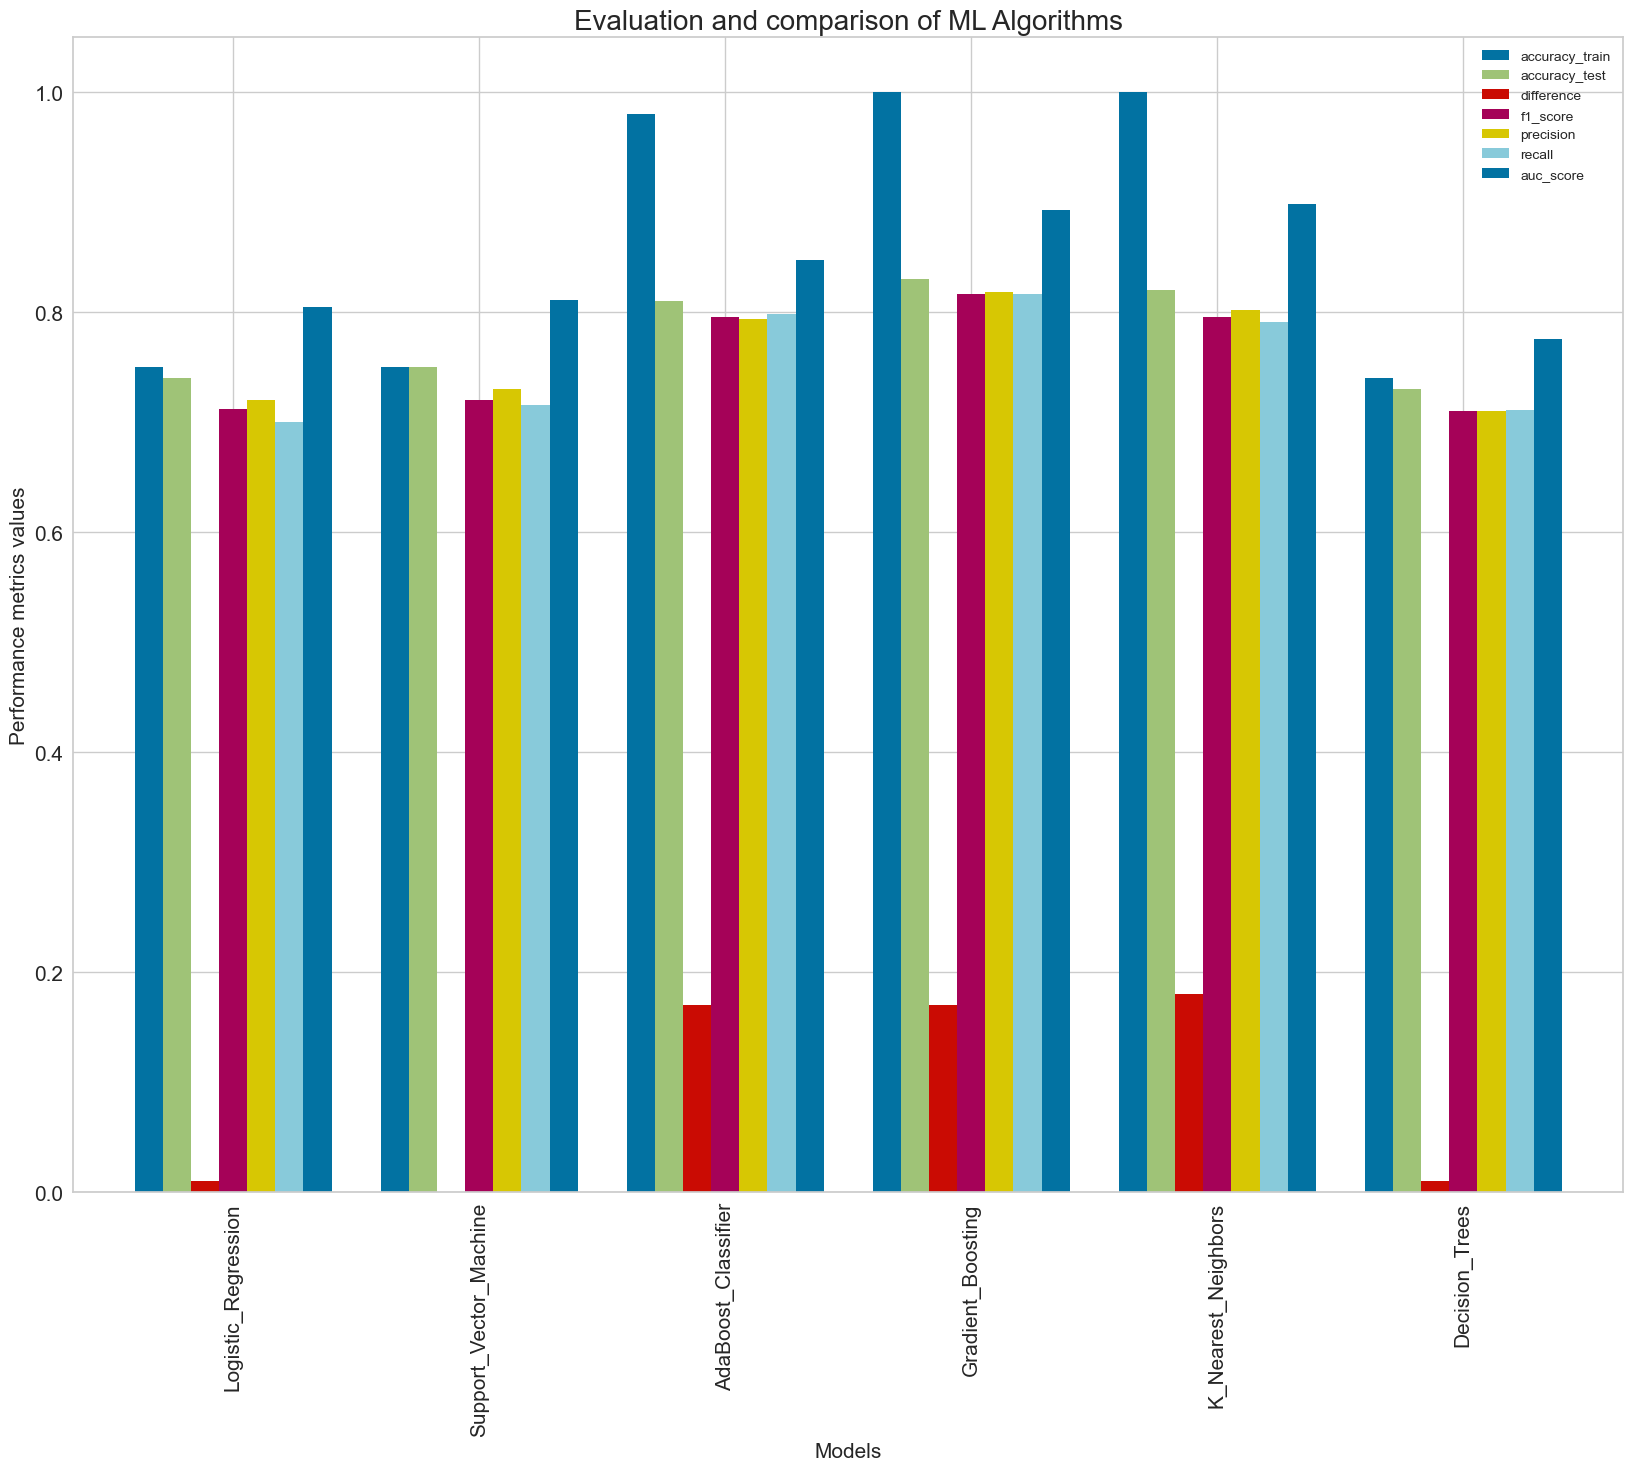

In [72]:
plt.figure(figsize=(15,10))
data_scores_1.plot(kind="bar",figsize=(20, 15),width=0.8, fontsize=15)
plt.title("Evaluation and comparison of ML Algorithms",fontsize=20)
plt.xlabel("Models",fontsize=15)
plt.ylabel("Performance metrics values",fontsize=15)

[Text(0.4444444444444444, 0.9375, 'X[4] <= 0.054\nentropy = 0.949\nsamples = 4872\nvalue = [1794, 3078]'),
 Text(0.2222222222222222, 0.8125, 'X[10] <= 0.101\nentropy = 0.749\nsamples = 1700\nvalue = [364, 1336]'),
 Text(0.1111111111111111, 0.6875, 'entropy = 0.968\nsamples = 81\nvalue = [49, 32]'),
 Text(0.3333333333333333, 0.6875, 'X[9] <= 0.423\nentropy = 0.711\nsamples = 1619\nvalue = [315, 1304]'),
 Text(0.2222222222222222, 0.5625, 'entropy = 0.943\nsamples = 651\nvalue = [235, 416]'),
 Text(0.4444444444444444, 0.5625, 'entropy = 0.411\nsamples = 968\nvalue = [80, 888]'),
 Text(0.6666666666666666, 0.8125, 'X[6] <= 0.088\nentropy = 0.993\nsamples = 3172\nvalue = [1430, 1742]'),
 Text(0.5555555555555556, 0.6875, 'entropy = 0.498\nsamples = 183\nvalue = [20, 163]'),
 Text(0.7777777777777778, 0.6875, 'X[8] <= 0.239\nentropy = 0.998\nsamples = 2989\nvalue = [1410, 1579]'),
 Text(0.6666666666666666, 0.5625, 'X[4] <= 0.099\nentropy = 0.999\nsamples = 2358\nvalue = [1214, 1144]'),
 Text(0.

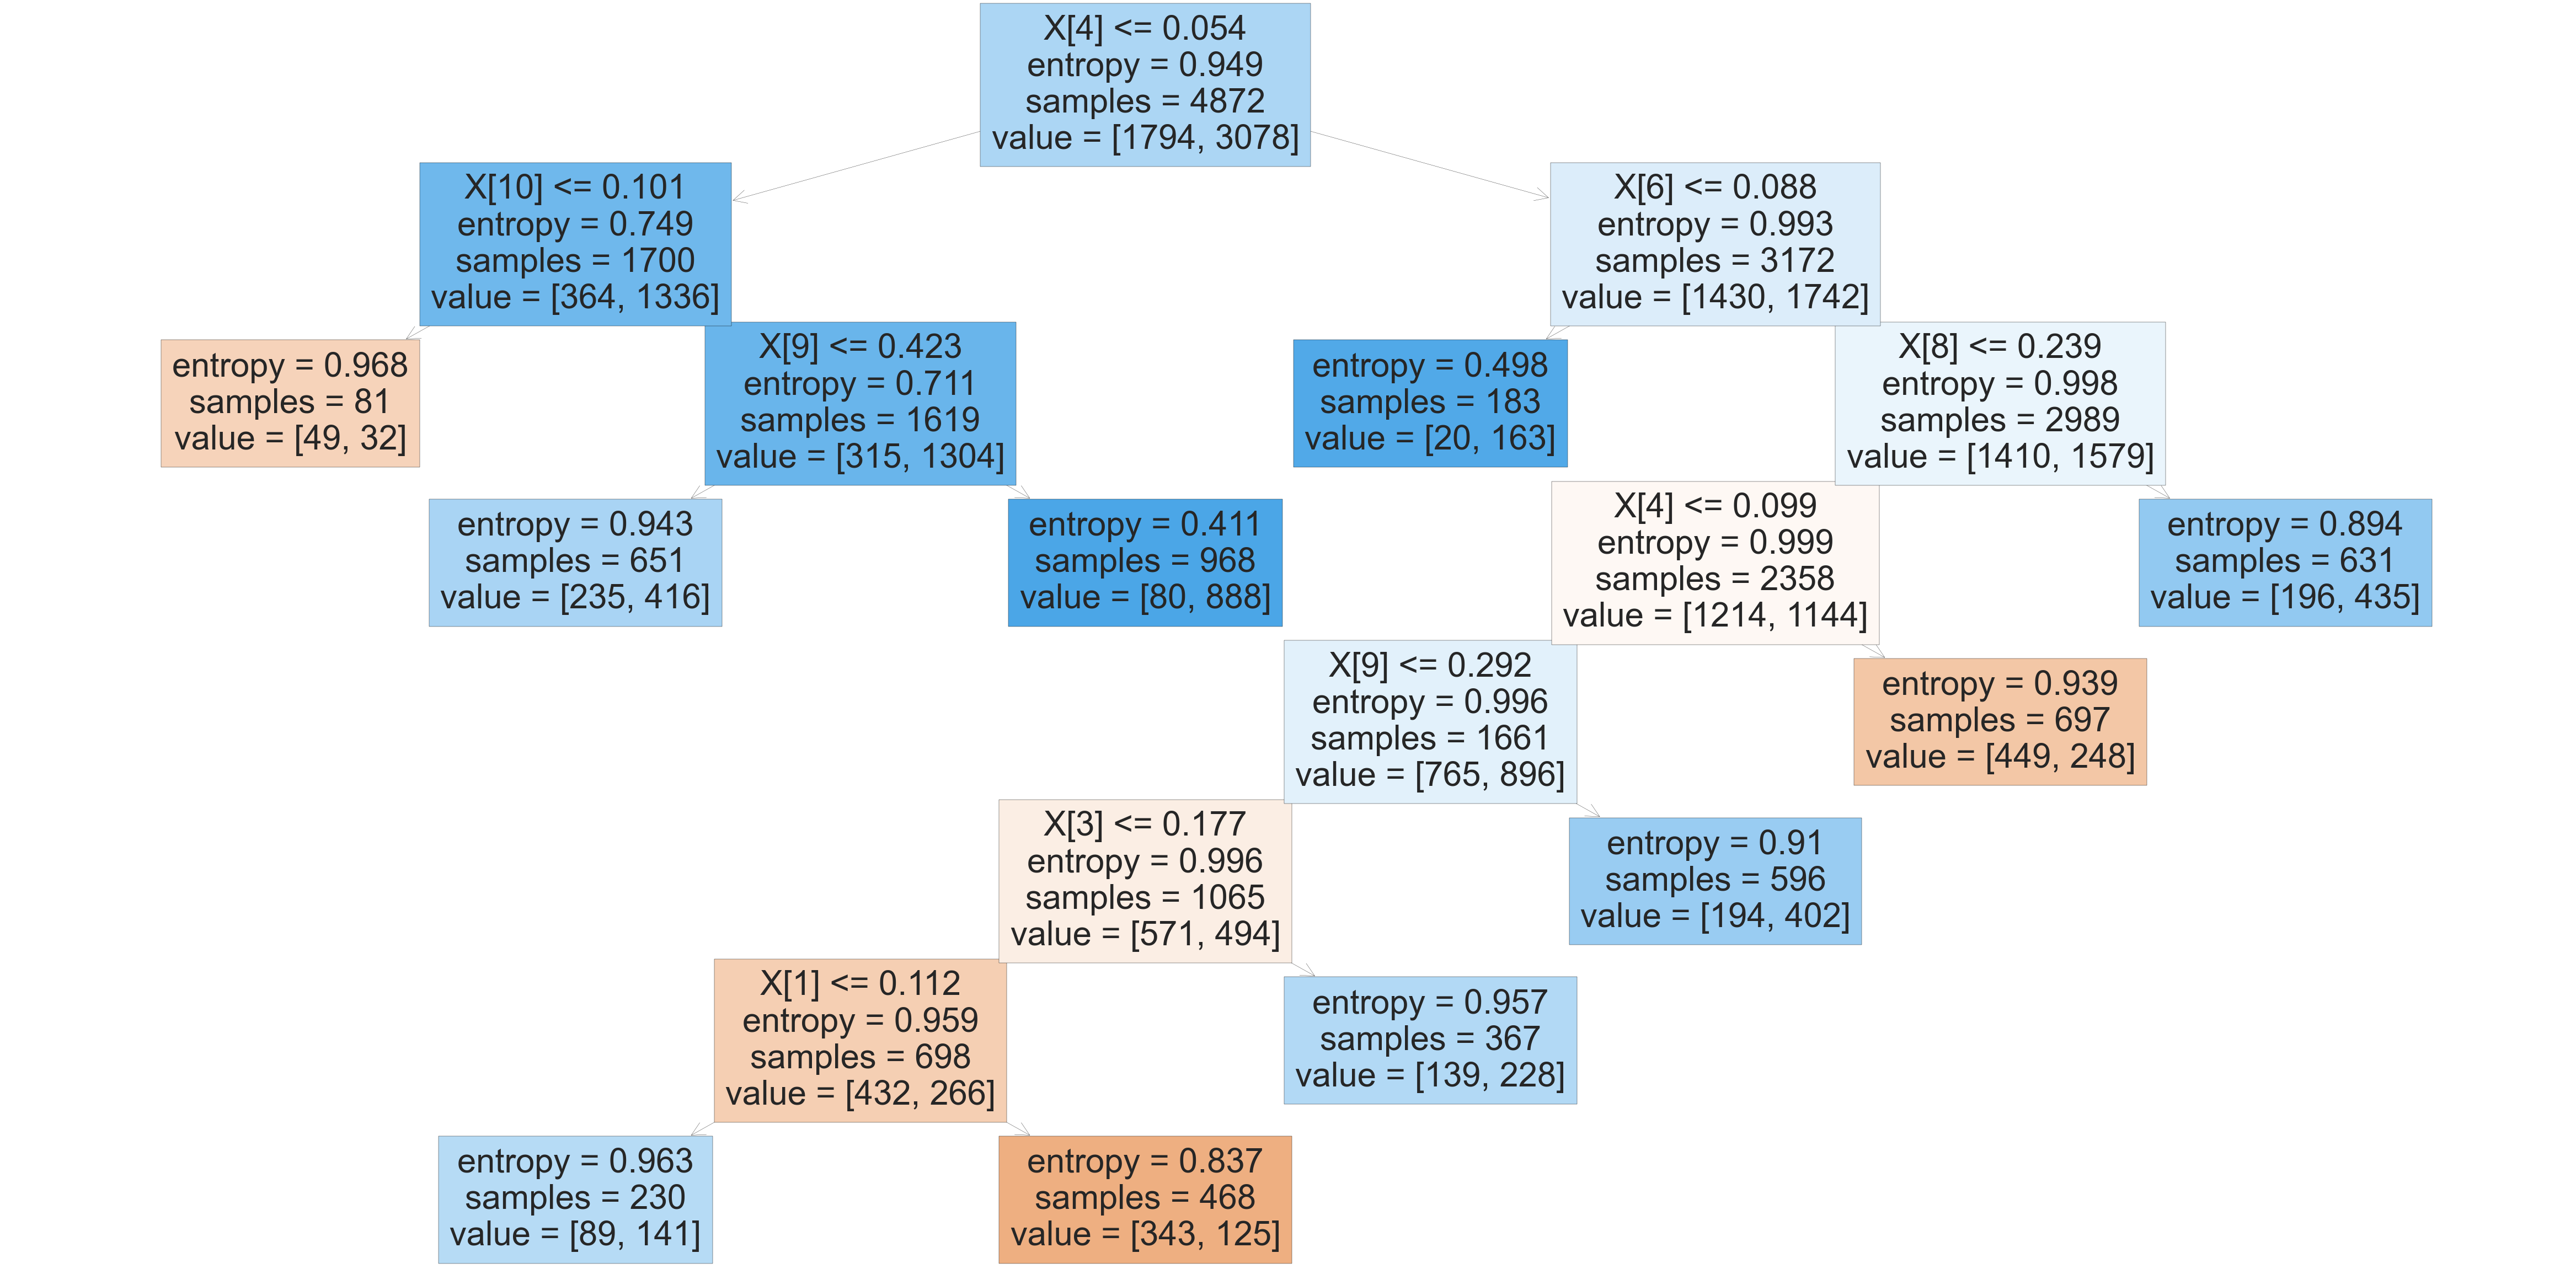

In [73]:
best_dt_25=DecisionTreeClassifier(criterion='entropy',max_depth=10,max_features='sqrt',max_leaf_nodes=10,min_samples_leaf=4,min_samples_split=6)
dt_25=best_dt_25.fit(X_train,y_train)
plt.figure(figsize=(60,30))
plt.title("Tree with test size=0.25")
plot_tree(dt_25, filled=True)